In [0]:
#Imports

import pandas as pd
import numpy as np
import os, time, pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
from tqdm import tqdm_notebook as t

In [0]:
#Base data and empty declarations
Sw = []

f = ['Switch01_Data.xlsx', 'Switch02_Data.xlsx','Switch03_Data.xlsx', 'Switch04_Data.xlsx', 'Switch05_Data.xlsx']
fsheet = ['Meetdata','Bouwstenen','Samenvattende Waarde']

In [22]:
for i,file in t(enumerate(f[:2])): #For all the Switches
  for filesheet in fsheet: #For each sheet in excel
    #Read the correct data for each sheet
    if filesheet == 'Meetdata':
      #Read data for the da
      Sw_Excel = pd.read_excel(file,sheet_name=filesheet)
    
      #Clean the empty Columns (NaN)
      Sw_Excel = Sw_Excel.dropna(axis = 'columns', how = 'all')
    
      #Extracting all the information and cleaning the NaN
      C_ControlLeft = Sw_Excel.iloc[:,:2].dropna(axis = 'index', how = 'all')
      C_ControlRight = Sw_Excel.iloc[:,2:4].dropna(axis = 'index', how = 'all')
      C_SteeringRight = Sw_Excel.iloc[:,4:6].dropna(axis = 'index', how = 'all')
      C_SteeringLeft = Sw_Excel.iloc[:,6:8].dropna(axis = 'index', how = 'all')
      C_MotorCurrent = Sw_Excel.iloc[:,8:10].dropna(axis = 'index', how = 'all')

    

    elif filesheet == 'Bouwstenen':
      #Read data for the da
      Sw_Excel = pd.read_excel(file,sheet_name=filesheet)
    
      #Clean the empty Columns (NaN)
      Sw_Excel = Sw_Excel.dropna(axis = 'columns', how = 'all')
      
      #Extracting all the information and cleaning the NaN
      C_ControlPosition = Sw_Excel.iloc[:,:2].dropna(axis = 'index', how = 'all')
      C_SteeringCommand = Sw_Excel.iloc[:,2:4].dropna(axis = 'index', how = 'all')
      C_MotorCurrentActive = Sw_Excel.iloc[:,4:6].dropna(axis = 'index', how = 'all')
    
      
    elif filesheet == 'Samenvattende Waarde':
      #Read data for the da
      Sw_Excel = pd.read_excel(file,sheet_name=filesheet)
    
      #Clean the empty Columns (NaN)
      Sw_Excel = Sw_Excel.dropna(axis = 'columns', how = 'all')
      
      #Extracting all the information and cleaning the NaN
      C_EnergySurfaceLeft = Sw_Excel.iloc[:,:2].dropna(axis = 'index', how = 'all')
      C_EnergySurfaceRight = Sw_Excel.iloc[:,2:4].dropna(axis = 'index', how = 'all')
      C_StartPeakLeft = Sw_Excel.iloc[:,4:6].dropna(axis = 'index', how = 'all')
      C_StartPeakRight = Sw_Excel.iloc[:,6:8].dropna(axis = 'index', how = 'all')
      C_MaxTransitionLeft = Sw_Excel.iloc[:,8:10].dropna(axis = 'index', how = 'all')
      C_MaxTransitionRight = Sw_Excel.iloc[:,10:12].dropna(axis = 'index', how = 'all')
      C_MotorTransitionTimeLeft = Sw_Excel.iloc[:,12:14].dropna(axis = 'index', how = 'all')
      C_MotorTransitionTimeRight = Sw_Excel.iloc[:,14:16].dropna(axis = 'index', how = 'all')
      C_RelayTransitionTimeRight = Sw_Excel.iloc[:,16:18].dropna(axis = 'index', how = 'all')
      C_RelayTransitionTimeLeft = Sw_Excel.iloc[:,18:20].dropna(axis = 'index', how = 'all')
      C_TimeEndMotorCurrentControlLeft = Sw_Excel.iloc[:,20:22].dropna(axis = 'index', how = 'all')
      C_TimeEndMotorCurrentControlRight = Sw_Excel.iloc[:,22:24].dropna(axis = 'index', how = 'all')
      C_TimeSteeringMotorCurrentLeft = Sw_Excel.iloc[:,24:26].dropna(axis = 'index', how = 'all')
      C_TimeSteeringMotorCurrentRight = Sw_Excel.iloc[:,26:28].dropna(axis = 'index', how = 'all')
      C_ControlOutTime = Sw_Excel.iloc[:,28:30].dropna(axis = 'index', how = 'all')
      C_SectionOcupationTime = Sw_Excel.iloc[:,30:32].dropna(axis = 'index', how = 'all')
    
    #Creation of the final df
  frames = [C_ControlPosition, C_SteeringCommand, C_MotorCurrentActive, C_ControlLeft, C_ControlRight, C_SteeringRight, C_SteeringLeft, C_MotorCurrent, C_EnergySurfaceLeft, C_EnergySurfaceRight, \
             C_StartPeakLeft, C_StartPeakRight, C_MaxTransitionLeft, C_MaxTransitionRight, C_MotorTransitionTimeLeft, C_MotorTransitionTimeRight, C_RelayTransitionTimeRight, C_RelayTransitionTimeLeft, \
             C_TimeEndMotorCurrentControlLeft, C_TimeEndMotorCurrentControlRight, C_TimeSteeringMotorCurrentLeft, C_TimeSteeringMotorCurrentRight, C_ControlOutTime, C_SectionOcupationTime]
  
  Sw.append(pd.concat(frames, keys = [C_ControlPosition.columns[1], C_SteeringCommand.columns[1], C_MotorCurrentActive.columns[1], C_ControlLeft.columns[1], C_ControlRight.columns[1], C_SteeringRight.columns[1], \
                                    C_SteeringLeft.columns[1], C_MotorCurrent.columns[1], C_EnergySurfaceLeft.columns[1], C_EnergySurfaceRight.columns[1], C_StartPeakLeft.columns[1], C_StartPeakRight.columns[1], \
                                    C_MaxTransitionLeft.columns[1], C_MaxTransitionRight.columns[1], C_MotorTransitionTimeLeft.columns[1], C_MotorTransitionTimeRight.columns[1], C_RelayTransitionTimeRight.columns[1], \
                                    C_RelayTransitionTimeLeft.columns[1], C_TimeEndMotorCurrentControlLeft.columns[1], C_TimeEndMotorCurrentControlRight.columns[1], C_TimeSteeringMotorCurrentLeft.columns[1], \
                                    C_TimeSteeringMotorCurrentRight.columns[1], C_ControlOutTime.columns[1], C_SectionOcupationTime.columns[1]], sort=False))
      
    

In [0]:
pd.DataFrame.to_csv(Sw[0])

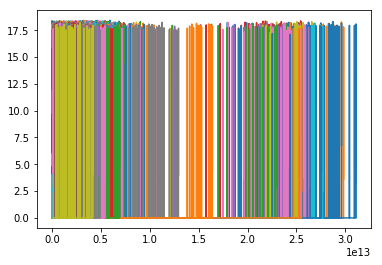

In [17]:
for i in Sw[0].MotorCurrentDate.dropna().index.get_level_values(1):
  if i%1000==0:
    plt.plot(Sw[0].MotorCurrentDate.dropna().iloc[i:i+1000]-Sw[0].MotorCurrentDate.dropna().iloc[i], Sw[0].MotorCurrent.dropna().iloc[i:i+1000], label = i)

In [19]:
SCD = Sw[1].SteeringCommandDate[25]
Sw[1].MotorCurrentDate.loc[Sw[1].MotorCurrentDate<=SCD].index.get_level_values(1)


Int64Index([], dtype='int64')

In [52]:
Sw[0].loc[Sw[0].ControlPosition=='Links in controle'].dropna().ControlPosition = -1

ControlPosition  0              Uit controle
                 1         Links in controle
                 2              Uit controle
                 3        Rechts in controle
                 4              Uit controle
                 5         Links in controle
                 6              Uit controle
                 7        Rechts in controle
                 8              Uit controle
                 9         Links in controle
                 10             Uit controle
                 11       Rechts in controle
                 12             Uit controle
                 13        Links in controle
                 14             Uit controle
                 15       Rechts in controle
                 16             Uit controle
                 17        Links in controle
                 18             Uit controle
                 19       Rechts in controle
                 20             Uit controle
                 21        Links in controle
          

In [54]:
Sw[0].describe()

,ControlLeft,ControlRight,SteeringLeft,SteeringRight,MotorCurrent,EnergySurfaceLeft,EnergySurfaceRight,StartPeakLeft,StartPeakRight,MaxTransitionLeft,...,MotorTransitionTimeLeft,MotorTransitionTimeRight,RelayTransitionTimeRight,RelayTransitionTimeLeft,TimeEndMotorCurrentControlLeft,TimeEndMotorCurrentControlRight,TimeSteeringMotorCurrentLeft,TimeSteeringMotorCurrentRight,ControlOutTime,SectionOcupationTime
count,7862.000000,7844.000000,7735.000000,7741.000000,379032.000000,3152.000000,3156.000000,3152.000000,3156.000000,3152.000000,...,3152.000000,3156.000000,3156.000000,3152.000000,3152.000000,3156.000000,3152.000000,3156.000000,6320.000000,6789.000000
mean,0.505724,0.492988,0.414867,0.415192,4.973984,5.299242,5.193965,17.967750,17.813945,4.338800,...,1.355004,1.359129,1.396537,1.399747,0.037660,0.029505,0.007083,0.007904,1.291990,25.584441
std,0.499999,0.499983,0.492731,0.492787,3.668574,0.243581,0.269910,0.200029,0.176956,0.060560,...,0.034352,0.039426,0.092311,0.102209,0.094192,0.080750,0.008633,0.009091,0.350997,67.333048
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.606455,4.563799,17.098389,17.112427,4.129922,...,1.263000,1.281998,1.296997,1.298996,0.000000,0.000000,0.000000,0.000000,0.100006,3.647995
25%,0.000000,0.000000,0.000000,0.000000,3.000793,5.133253,4.982175,17.832870,17.692566,4.301041,...,1.332001,1.330002,1.350006,1.350006,0.016998,0.007996,0.000000,0.000000,1.250000,16.000000
50%,1.000000,0.000000,0.000000,0.000000,3.724976,5.327170,5.157393,17.977905,17.822876,4.345216,...,1.360001,1.350006,1.399994,1.399994,0.028000,0.026993,0.001999,0.002991,1.299988,20.900986
75%,1.000000,1.000000,1.000000,1.000000,5.060120,5.476092,5.435910,18.115921,17.945633,4.382649,...,1.380005,1.397003,1.448990,1.400009,0.038010,0.037003,0.013000,0.013000,1.300003,27.045990
max,1.000000,1.000000,1.000000,1.000000,18.435364,5.905579,5.796677,18.435364,18.223877,4.492467,...,1.440002,1.449997,2.452011,2.432999,1.000000,1.000000,0.024002,0.033005,15.000000,4426.403000


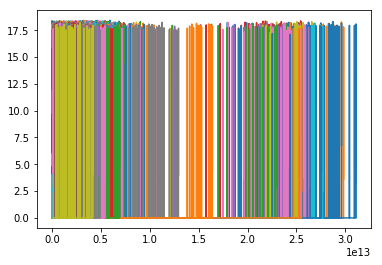

In [5]:
for i in Sw[0].MotorCurrentDate.dropna().index.get_level_values(1):
  if i%1000==0:
    plt.plot(Sw[0].MotorCurrentDate.dropna().iloc[i:i+1000]-Sw[0].MotorCurrentDate.dropna().iloc[i], Sw[0].MotorCurrent.dropna().iloc[i:i+1000], label = i)

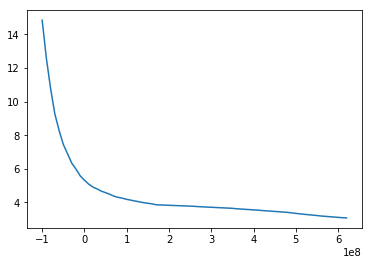

In [28]:
plt.plot(Sw[0].MotorCurrentDate.dropna().iloc[i-10:i+30]-Sw[0].MotorCurrentDate.dropna().iloc[i], Sw[0].MotorCurrent.dropna().iloc[i-10:i+30], label = i)

In [41]:
Sw[0].MotorCurrent.describe()

count    379032.000000
mean          4.973984
std           3.668574
min           0.000000
25%           3.000793
50%           3.724976
75%           5.060120
max          18.435364
Name: MotorCurrent, dtype: float64

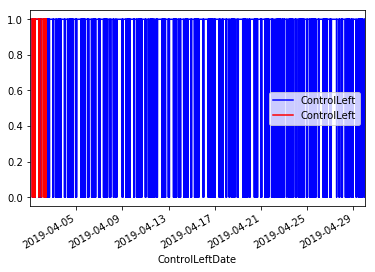

In [0]:
ax = plt.gca()
ControlLeft[0].plot(kind='line',x='ControlLeftDate',y='ControlLeft', color='blue', ax=ax)
ControlLeft[0].iloc[0:100].plot(drawstyle='steps-post',x='ControlLeftDate',y='ControlLeft', color='red', ax=ax)